In [6]:
from tqix import *
from tqix.pis import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

N = 10 #particles
qc = circuit(N) #createcircuit

#apply squeezing: OAT,TAT,TNT 
#theta1 = np.pi/4.0
#theta2 = np.pi/3.0
#qc.OAT(theta1, 'x')
#qc.TAT(theta2, 'xy')

def H0(h):
    Jz = qc.Jz()
    return h * Jz

def H1(lamb):
    Jx = qc.Jx()
    Jy = qc.Jy()
    Jz = qc.Jz()
    return lamb / N * (Jx @ Jx - Jy @ Jy)

def E0(rho,h):
    H = H0(h)
    expectJ = np.trace(rho @ H)
    return expectJ

def Et(rho,h,lamb,t):
    H = H1(lamb).toarray()
    U = expm(-1j * H * t)
    rho_t = U @ rho @ daggx(U)
    return np.real(np.trace (rho_t @ H0(h)))

#togetstateinformation
rho = qc.state#sparsematrix
rho = qc.state.toarray()#fullmatrix

time = np.linspace(0.001, 10, 20)
thetas = np.linspace(0, np.pi/2, 20)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.21328944619904233+0j) 1.0535263157894736 0.24802047265182575


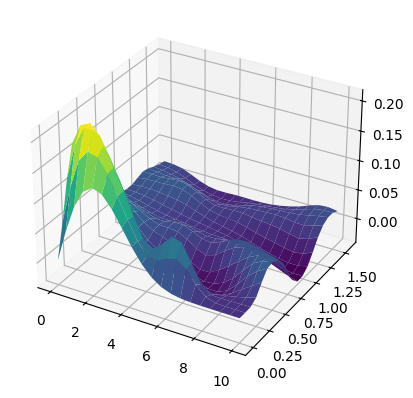

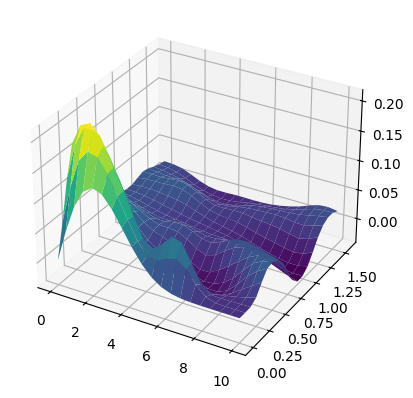

In [8]:
wt = []
pt = []
h = 0.05
lamb = 1.5
for t in time:
    for theta in thetas:
        qc = circuit(N)

        qc.OAT(theta,'X')
        rho = qc.state.toarray()
        dE = Et(rho,h,lamb,t)-E0(rho,h)
        wt.append(dE)
        pt.append(dE/t)

time_grid, thetas_grid = np.meshgrid(time, thetas)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
pt_reshaped = np.array(pt).reshape(time_grid.shape)

#plt.plot(time, wt, label = "Energy")
ax.plot_surface(time_grid, thetas_grid, pt_reshaped, cmap='viridis')
#plt.plot(time, pt, label = "Power") 
#plt.legend()
plt.savefig("enery-power.png")
#plt.show()
wt = []
pt = []
h = 0.05
lamb = 1.5

t_opt = 0
theta_opt = 0
Pmax = 0
for t in time:
    for theta in thetas:
        qc = circuit(N)

        qc.OAT(theta,'X')
        rho = qc.state.toarray()
        dE = Et(rho,h,lamb,t)-E0(rho,h)
        wt.append(dE)
        pt.append(dE/t)
        if dE/t > Pmax:
            Pmax = dE/t
            t_opt = t
            theta_opt = theta

time_grid, thetas_grid = np.meshgrid(time, thetas)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
pt_reshaped = np.array(pt).reshape(time_grid.shape)

#plt.plot(time, wt, label = "Energy")
ax.plot_surface(time_grid, thetas_grid, pt_reshaped, cmap='viridis')
#plt.plot(time, pt, label = "Power") 
#plt.legend()
plt.savefig("enery-power.png")
Pmax = np.max(pt_reshaped)
print (Pmax, t_opt, theta_opt)